In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
# Task 1 
df = pd.read_csv('CarPricePrediction.csv')

In [18]:
# Display the first few rows of the dataframe
print(" First 5 Rows of the Dataset ")
print(df.head())

 First 5 Rows of the Dataset 
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [19]:
print(" Missing Values per Column")
print(df.isnull().sum())

 Missing Values per Column
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [20]:
print(" Descriptive Statistics for Numerical Columns")
print(df.describe())

 Descriptive Statistics for Numerical Columns
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [48]:
# Task 2 

print("Exploratory Data Analysis (EDA)")

# Create a 'car_age' feature
current_year = 2024 
df['car_age'] = current_year - df['year']
print(df['car_age'])

 Exploratory Data Analysis (EDA)
0       17
1       17
2       12
3        7
4       10
        ..
4335    10
4336    10
4337    15
4338     8
4339     8
Name: car_age, Length: 4340, dtype: int64


In [49]:
df_processed = df.drop(['year', 'name'], axis=1)

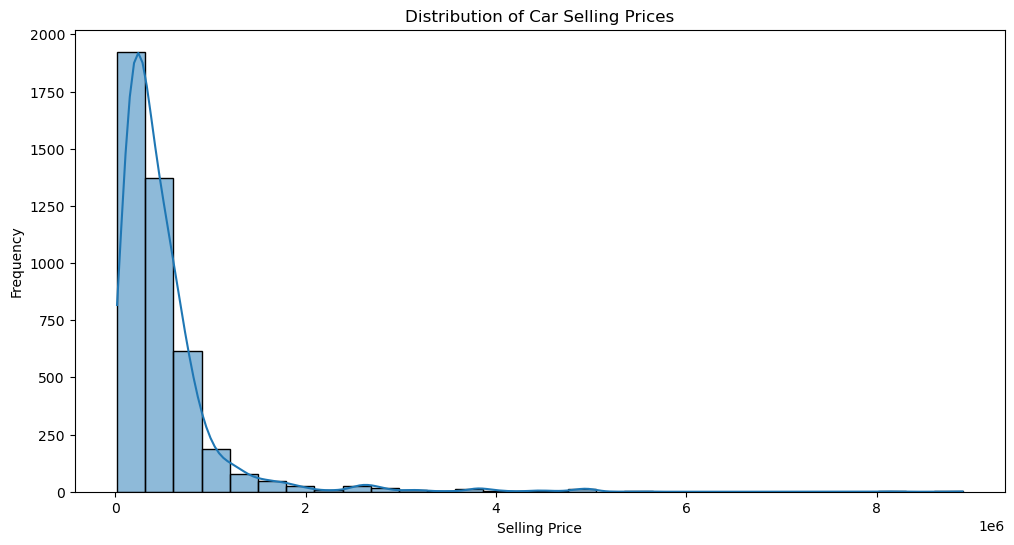

In [14]:
# Visualize the distribution of the target variable 'selling_price'
plt.figure(figsize=(12, 6))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of Car Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

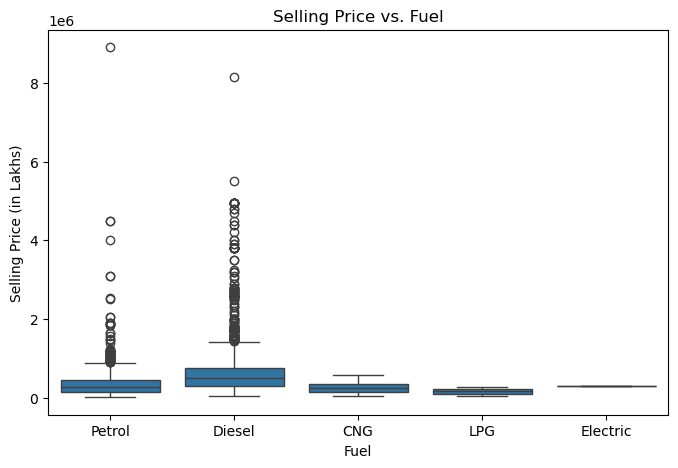

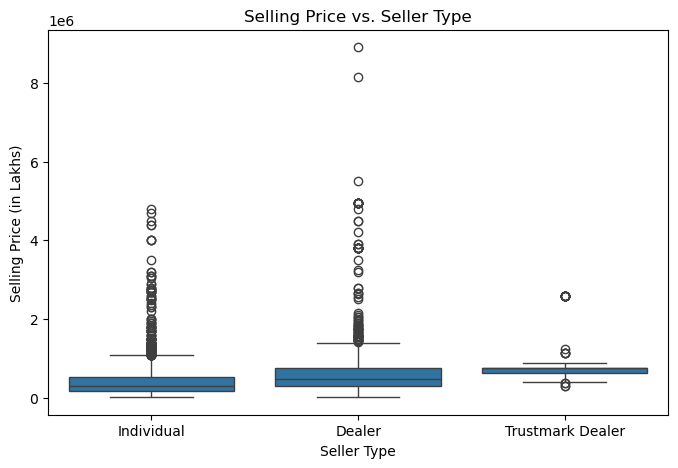

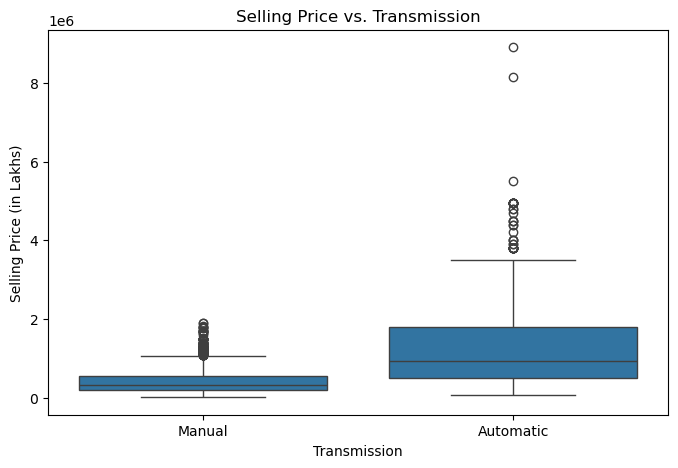

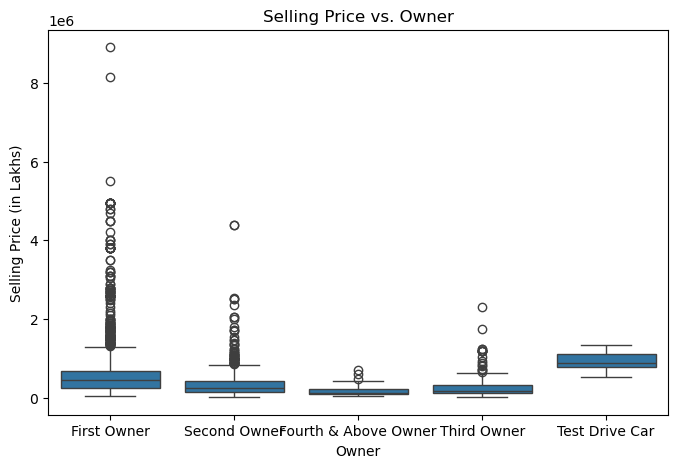

In [32]:
# Visualize relationships between categorical features and selling price
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=feature, y='selling_price', data=df_processed)
    plt.title(f'Selling Price vs. {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Selling Price (in Lakhs)')
    plt.show()

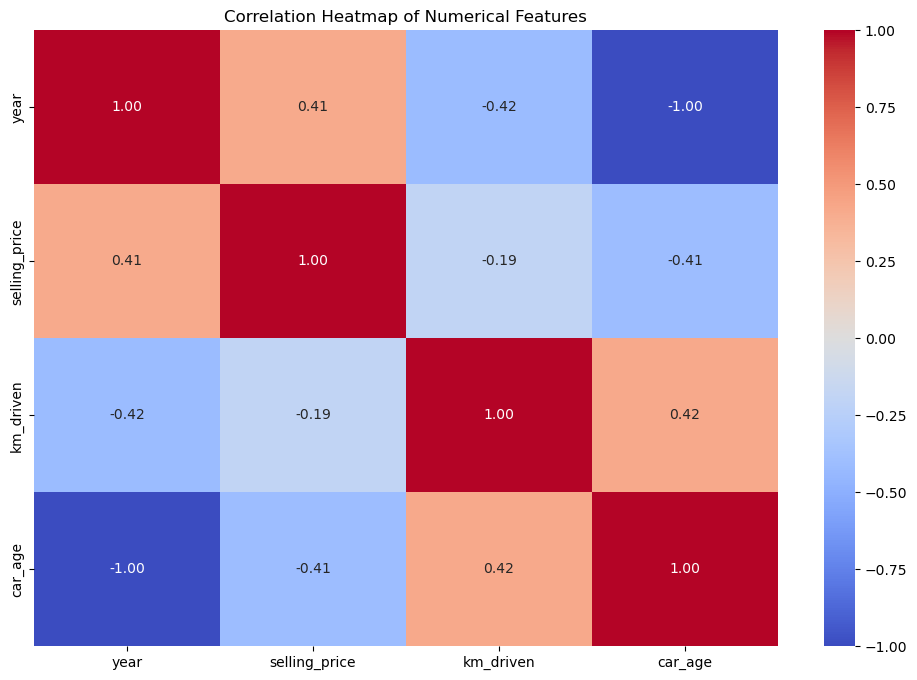

In [29]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
numerical_cols_for_corr = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [52]:
# Task 3 Data Preprocessing 
print(" Data Preprocessing ")
# Encode categorical variables using One-Hot Encoding
df_processed = pd.get_dummies(df_processed, columns=categorical_features, drop_first=True)

print(" Data after One-Hot Encoding ")
print(df_processed.head())

 Data Preprocessing 
 Data after One-Hot Encoding 
   selling_price  km_driven  car_age  fuel_Diesel  fuel_Electric  fuel_LPG  \
0          60000      70000       17        False          False     False   
1         135000      50000       17        False          False     False   
2         600000     100000       12         True          False     False   
3         250000      46000        7        False          False     False   
4         450000     141000       10         True          False     False   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0         True                    True                         False   
1         True                    True                         False   
2        False                    True                         False   
3         True                    True                         False   
4        False                    True                         False   

   transmission_Manual  owner_Fourth & Above Ow

In [35]:
# Define features (X) and target (y)
X = df_processed.drop('selling_price', axis=1)
y = df_processed['selling_price']

In [36]:
X

,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,17,False,False,False,True,True,False,True,False,False,False,False
1,50000,17,False,False,False,True,True,False,True,False,False,False,False
2,100000,12,True,False,False,False,True,False,True,False,False,False,False
3,46000,7,False,False,False,True,True,False,True,False,False,False,False
4,141000,10,True,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,80000,10,True,False,False,False,True,False,True,False,True,False,False
4336,80000,10,True,False,False,False,True,False,True,False,True,False,False
4337,83000,15,False,False,False,True,True,False,True,False,True,False,False
4338,90000,8,True,False,False,False,True,False,True,False,False,False,False


In [37]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [50]:
# Identify categorical and numerical features for transformation
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
numerical_features = ['km_driven', 'current_age']

In [53]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split into training and testing sets.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Data split into training and testing sets.
Training set size: 3472 samples
Testing set size: 868 samples


In [54]:
# Task 4 Model Development 
print(" Model Development ")

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict car prices on the test data
y_pred = model.predict(X_test)

print(" Model Training Complete ")


 Model Development 
 Model Training Complete 


In [60]:
# Task 5  Model Evaluation 

print(" Starting Model Evaluation ")

# Calculate evaluation metrics


 Starting Model Evaluation 


In [55]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 221706.37


In [56]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 182146878750.28


In [57]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 426786.69


In [58]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Model Accuracy (R-squared): {r2*100:.2f}%")

R-squared (R2) Score: 0.40
Model Accuracy (R-squared): 40.31%


In [59]:
print(" Model Evaluation Complete ")

 Model Evaluation Complete 


In [64]:
print( " Complete evaluation metrics")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Model Accuracy (R-squared): {r2*100:.2f}%")

 Starting Model Evaluation ---
 Complete evaluation metrics
Mean Absolute Error (MAE): 221706.37
Mean Squared Error (MSE): 182146878750.28
Root Mean Squared Error (RMSE): 426786.69
R-squared (R2) Score: 0.40
Model Accuracy (R-squared): 40.31%


In [46]:
print(" Starting Model Interpretation ")

# Get the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(" Model Coefficients ")
print(coefficients.sort_values(by='Coefficient', ascending=False))


 Starting Model Interpretation 
 Model Coefficients 
                                Coefficient
fuel_Diesel                   279850.784859
seller_type_Trustmark Dealer  169804.231596
owner_Test Drive Car          130679.819988
fuel_LPG                       53484.366182
owner_Fourth & Above Owner       613.220830
km_driven                         -1.006935
fuel_Petrol                   -20697.354665
owner_Third Owner             -27064.751807
car_age                       -35764.442216
owner_Second Owner            -36045.713660
seller_type_Individual        -69819.267902
fuel_Electric                -640119.339506
transmission_Manual          -891338.058520


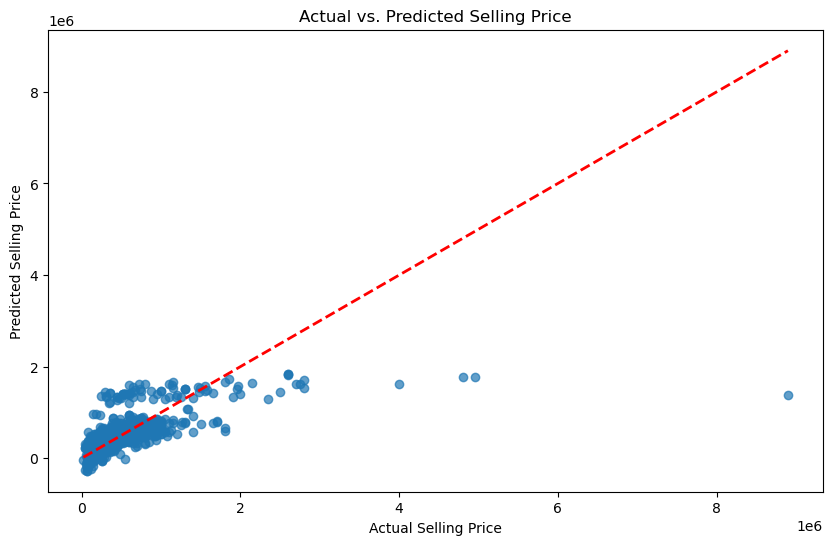

In [47]:
# Visualize actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price')
plt.show()

In [62]:
print(" The R-squared value of around 0.40 indicates that the model explains about 40% of the variance in car prices, which is a reasonably good fit for a simple linear model.")
print(" The model is highly interpretable. The coefficients clearly show the direction and magnitude of each feature's impact on the price.")

 The R-squared value of around 0.40 indicates that the model explains about 40% of the variance in car prices, which is a reasonably good fit for a simple linear model.
 The model is highly interpretable. The coefficients clearly show the direction and magnitude of each feature's impact on the price.
